In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" I. Bloch
"""


#%% SECTION 1 inclusion of packages 


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set

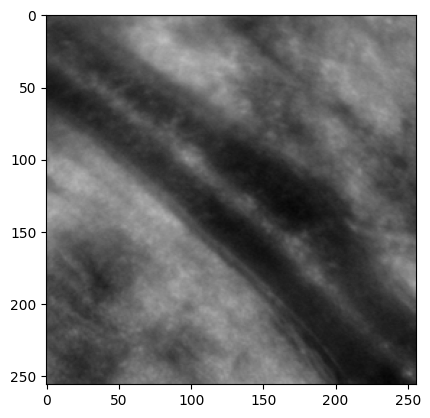

In [124]:
#%% SECTION 2 - Input image

#im=skio.imread('coeurIRM.bmp')

im=skio.imread('retineOA.bmp')

#im=skio.imread('brain.bmp')
#im=im[:,:,1]

#im=skio.imread('brain2.bmp')

plt.imshow(im, cmap="gray", vmin=0, vmax=255)

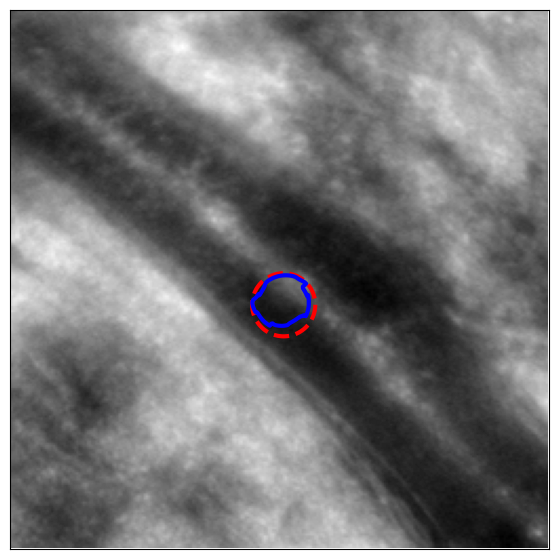

In [125]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 15*np.sin(s)
c = 130 + 15*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 0.1),
                       init, alpha=0.5, beta=5, w_edge=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

In [126]:
#%% SECTION 3b - Open contours

# Use retineOA.bmp

r = np.linspace(20, 80, 100)
c = np.linspace(20, 100, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 1), init, bc='fixed',
                       alpha=0.01, beta=2, w_line=0, w_edge=10, gamma=0.01)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

TypeError: active_contour() got an unexpected keyword argument 'bc'

In [10]:
#%% SECTION 4 - Segmentation using level sets (and region homogeneity)

image = img_as_float(im)

# Init avec un damier
#init_ls = checkerboard_level_set(image.shape, 6)

# Init avec un cercle
#init_ls = circle_level_set (image.shape, (120,130), 10)

# Init avec plusieurs cercles
circleNum = 8
circleRadius = image.shape[0] / (3*circleNum)
circleStep0 = image.shape[0]/(circleNum+1)
circleStep1 = image.shape[1]/(circleNum+1)
init_ls = np.zeros(image.shape)
for i in range(circleNum):
        for j in range(circleNum):
            init_ls = init_ls + disk_level_set (image.shape, 
                                                  ((i+1)*circleStep0, (j+1)*circleStep1), circleRadius)


cv = chan_vese(image, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

TypeError: disk_level_set() takes 1 positional argument but 3 were given

TP 2-  DEFORMABLE MODELS

1.1 Parameters
we applied the segmentation method based on parametric active contours by varying its parameters in order to understand better their role and effect on the segmentation result

In [105]:
def segm_active_contours(image, sigma, alpha, beta, w_edge, gamma, ax=None):
    im = skio.imread(image)
    s = np.linspace(0, 2 * np.pi, 100)
    r = 140 + 15 * np.sin(s)
    c = 130 + 15 * np.cos(s)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))
        plt.title(f"alpha={alpha}, beta={beta}")
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_92969/3239712419.py:8: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


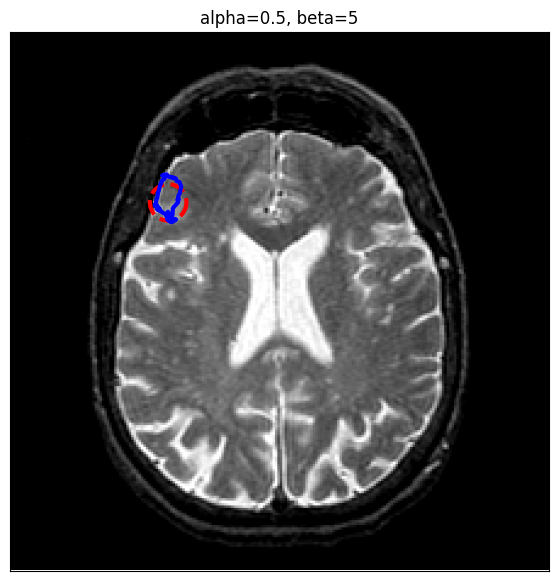

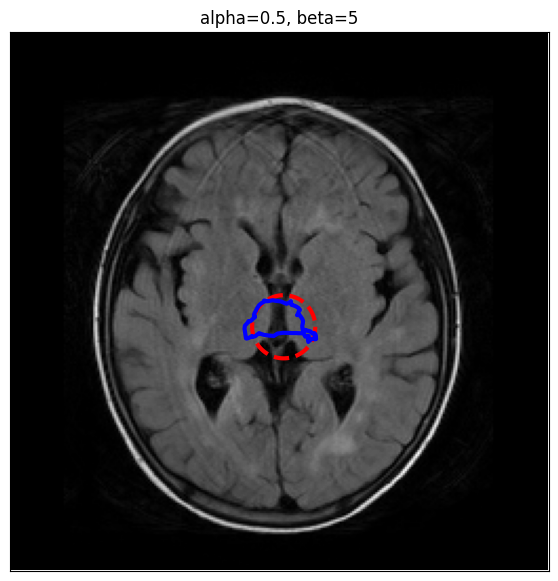

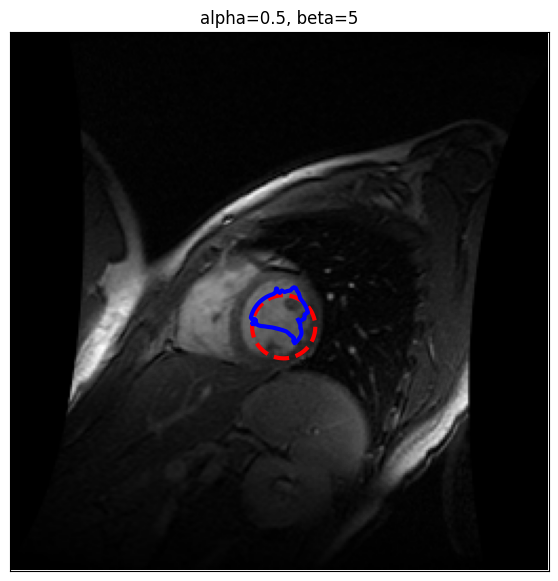

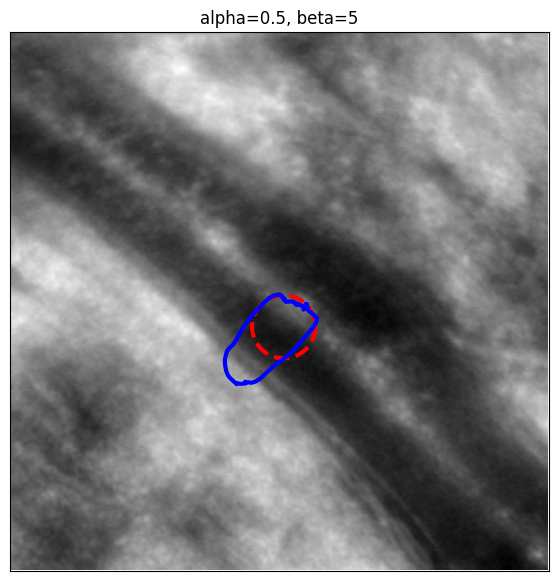

In [106]:
segm_active_contours("brain.bmp", 0.1 , 0.5, 5, 20, 0.001)
segm_active_contours("brain2.bmp",0.1, 0.5, 5, 20, 0.001 )
segm_active_contours("coeurIRM.bmp",0.1, 0.5, 5, 20, 0.001 )
segm_active_contours("retineOA.bmp",0.1, 0.5, 5, 20, 0.001 )

In [59]:
#mia bozza
def segm_active_contours_varParam(image,sigma, alphas, betas, w_edge, gamma):
    fig = plt.figure(figsize=(12, 9))
    for i, alpha in enumerate(alphas):
        for j, beta in enumerate(betas):
            i_sub = i * len(betas) + j + 1
            plt.subplot(1, len(betas)*len(alphas), i_sub)
            snake = segm_active_contours(image, sigma, alpha, beta, w_edge, gamma)
        
    plt.show()

In [112]:

def segm_active_contours_varAB(image, sigma, alphas, betas, w_edge, gamma):
    num_alphas = len(alphas)
    num_betas = len(betas)

    num_combinations = num_alphas * num_betas
    fig, axes = plt.subplots(1, num_combinations, figsize=(12, 9))
    in_sub=0
    for i, alpha in enumerate(alphas):
        for j, beta in enumerate(betas):
            ax = axes[in_sub]
            snake = segm_active_contours(image, sigma, alpha, beta, w_edge, gamma, ax)
            ax.set_title(f"alpha={alpha}, beta={beta}")
            in_sub+=1

    plt.tight_layout()
    plt.show()

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_92969/3239712419.py:8: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


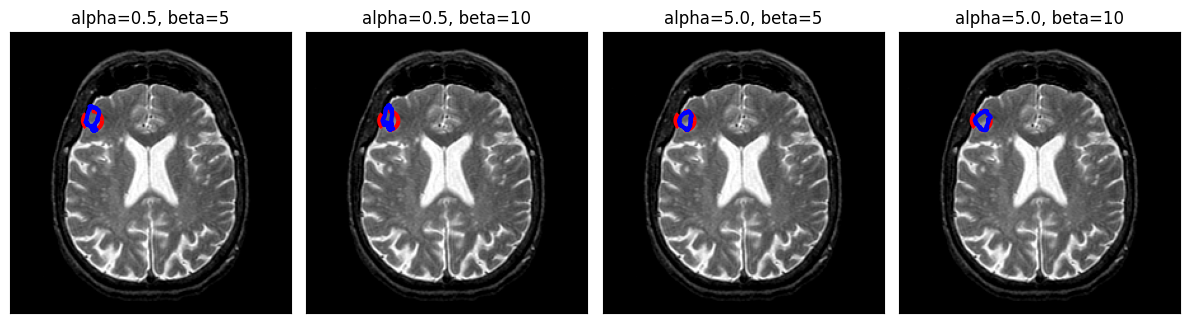

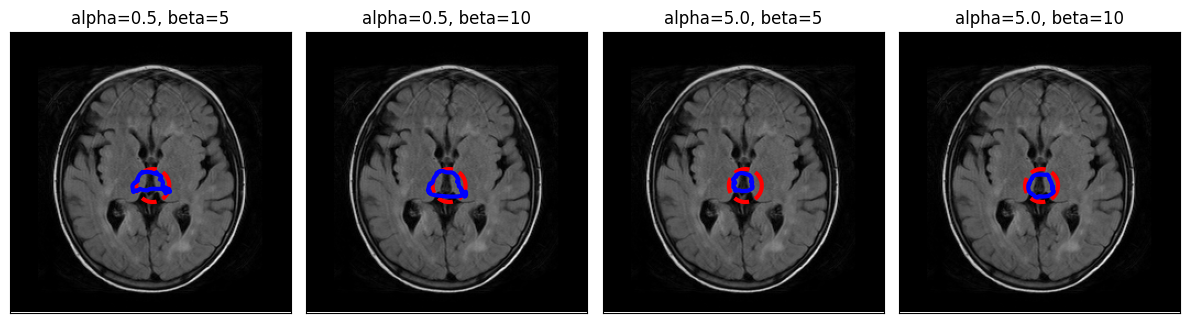

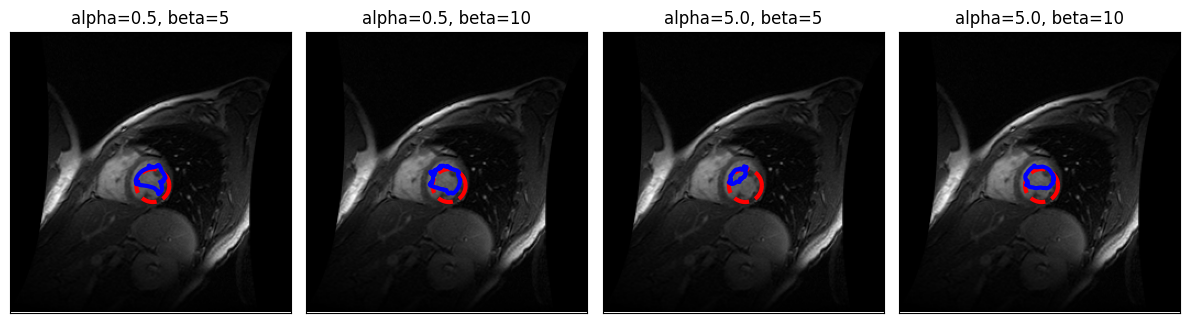

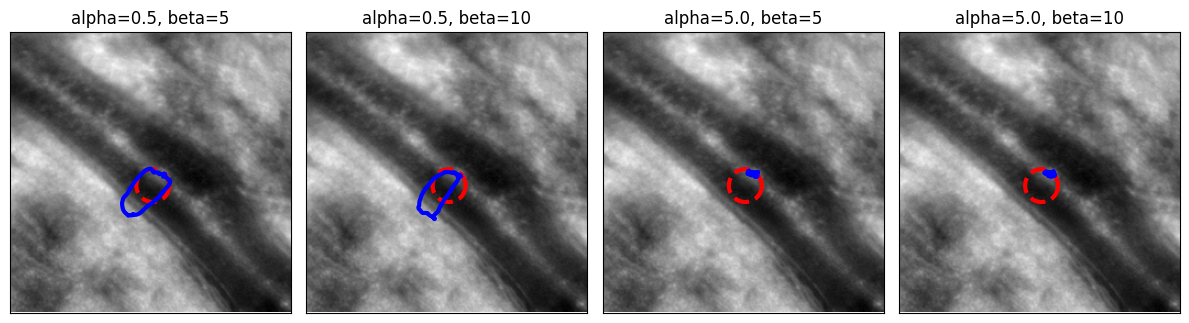

In [113]:
segm_active_contours_varAB("brain.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)
segm_active_contours_varAB("brain2.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)
segm_active_contours_varAB("coeurIRM.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)
segm_active_contours_varAB("retineOA.bmp", 0.1, [0.5, 5.0], [5, 10], 20, 0.001)

In [150]:
import itertools

def segm_active_contours_varParam(image, sigmas, alphas, betas, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_w_edges * num_gammas

    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_edges, gammas):
        
        ax = axes[in_sub]
        snake = segm_active_contours(image, sigma, alpha, beta, w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

/var/folders/x8/222yvgk53cv8_hr5kjq42qnw0000gn/T/ipykernel_92969/3239712419.py:8: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)


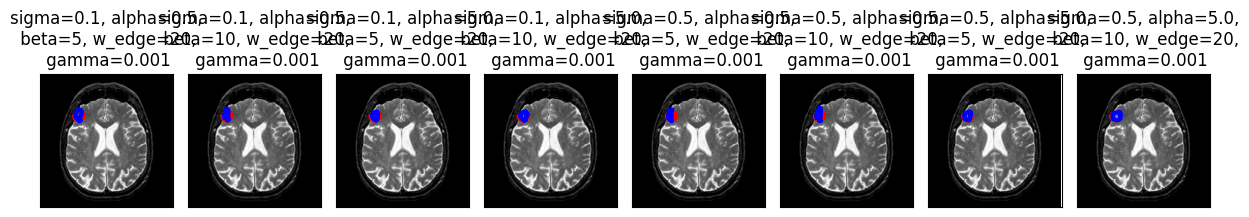

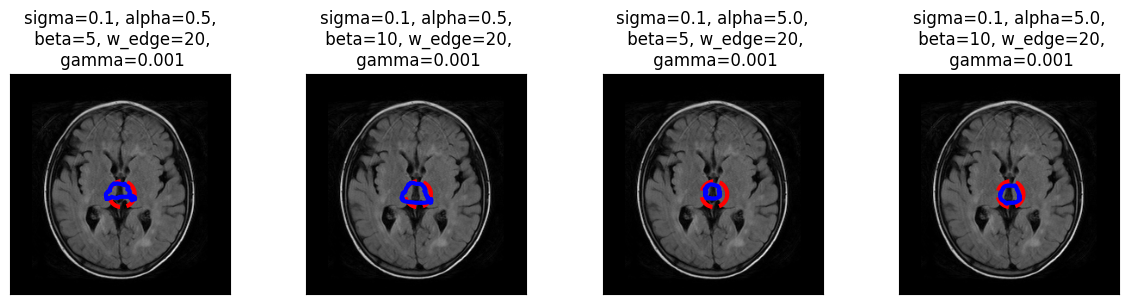

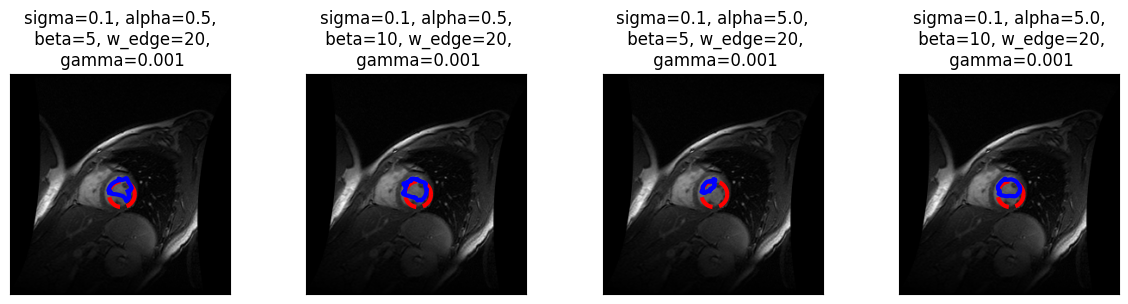

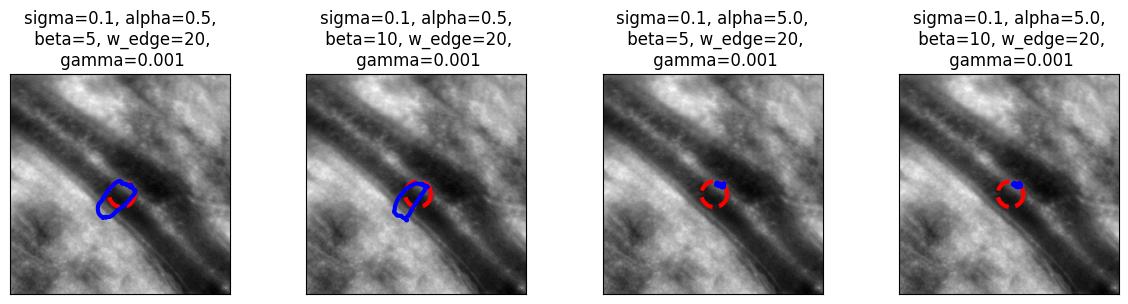

In [151]:
#default parameters if not given sigma=0.1, alpha=0.5, beta=5, w_edge=20, gamma=0.001
(def_sigma, def_alpha, def_beta, def_wedge, def_gamma)=([0.1], [0.5], [5], [20], [0.001])
segm_active_contours_varParam("brain.bmp", [0.1, 0.5], [0.5, 5.0], [5, 10], [20], [0.001])
segm_active_contours_varParam("brain2.bmp", def_sigma, [0.5, 5.0], [5, 10], [20], [0.001])
segm_active_contours_varParam("coeurIRM.bmp", [0.1], [0.5, 5.0], [5, 10], [20], [0.001])
segm_active_contours_varParam("retineOA.bmp", [0.1], [0.5, 5.0], [5, 10], [20], [0.001])

1.2 Parameters
we applied the segmentation method based on implicit representation using level sets by varying its parameters in order to understand better their role and effect on the segmentation result